In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Business class

In [68]:
business_df = pd.read_csv('business.csv')
economy_df = pd.read_csv('economy.csv')

In [69]:
print(business_df.sample())
print(economy_df.sample())

             date    airline ch_code  num_code dep_time       from time_taken  \
70338  27-03-2022  Air India      AI       546    21:15  Hyderabad    11h 40m   

                                                    stop arr_time     to  \
70338  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:55  Delhi   

        price  
70338  42,724  
              date  airline ch_code  num_code dep_time       from time_taken  \
115203  28-03-2022  Vistara      UK       810    07:00  Bangalore    10h 00m   

                                                     stop arr_time         to  \
115203  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    17:00  Hyderabad   

        price  
115203  6,262  


In [70]:
print(business_df.columns)
print(economy_df.columns)

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')
Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')


In [71]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


## adding class categorical column

In [72]:
business_df['class'] = 'Business'
economy_df['class'] = 'Economy'

# merging both dataframes

In [147]:
df = pd.concat([business_df,economy_df],axis=0)

In [148]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business


In [149]:
business_df.shape

(93487, 12)

In [150]:
economy_df.shape

(206774, 12)

In [151]:
business_df.shape[0]+economy_df.shape[0]

300261

In [152]:
df.shape

(300261, 12)

# Data Cleaning

In [153]:
df['price']=df['price'].str.replace(',','').astype('float')
df['num_code']=df['num_code'].astype('str')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        300261 non-null  object 
 1   airline     300261 non-null  object 
 2   ch_code     300261 non-null  object 
 3   num_code    300261 non-null  object 
 4   dep_time    300261 non-null  object 
 5   from        300261 non-null  object 
 6   time_taken  300261 non-null  object 
 7   stop        300261 non-null  object 
 8   arr_time    300261 non-null  object 
 9   to          300261 non-null  object 
 10  price       300261 non-null  float64
 11  class       300261 non-null  object 
dtypes: float64(1), object(11)
memory usage: 29.8+ MB


In [155]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [156]:
df[df.duplicated()]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,12150.0,Economy
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,4780.0,Economy


In [157]:
df.drop_duplicates(inplace=True)

In [158]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class'],
      dtype='object')

- from : source_city
- ch_code+num_code : flight_code
- dep_time : departure_time
- stop : stops
- arr_time : arrival_time
- to : destination_city
- class : (it has two categorical values business and economy)
- time_taken : duration
- 

In [159]:
print(df['num_code'].dtype)
print(df['ch_code'].dtype)

object
object


In [161]:
df['flight_code'] = df['ch_code']+'-'+df['num_code']

In [162]:
df['flight_code'].unique()


array(['AI-868', 'AI-624', 'AI-531', ..., '6E-557', '6E-7127', '6E-7259'],
      dtype=object)

In [163]:
df['ch_code'].unique()

array(['AI', 'UK', 'SG', 'I5', 'G8', '6E', '2T', 'S5'], dtype=object)

In [164]:
df['num_code'].unique()

array(['868', '624', '531', ..., '7141', '7127', '7259'], dtype=object)

In [165]:
col_dict={'from':'source_city','to':'destination_city','time_taken':'duartion','stop':'stops'}

In [166]:
df.rename(columns=col_dict,inplace=True)

In [167]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'source_city',
       'duartion', 'stops', 'arr_time', 'destination_city', 'price', 'class',
       'flight_code'],
      dtype='object')

In [168]:
df.drop(columns=['ch_code', 'num_code'],inplace=True)

In [169]:
df.columns

Index(['date', 'airline', 'dep_time', 'source_city', 'duartion', 'stops',
       'arr_time', 'destination_city', 'price', 'class', 'flight_code'],
      dtype='object')

In [170]:
df.shape

(300259, 11)

In [172]:
df.loc[df['class']=='business','class_label'] =1
df.loc[df['class']=='economy','class_label'] =0


# visualization

Text(0.5, 1.0, 'Price vs Airline Histogram')

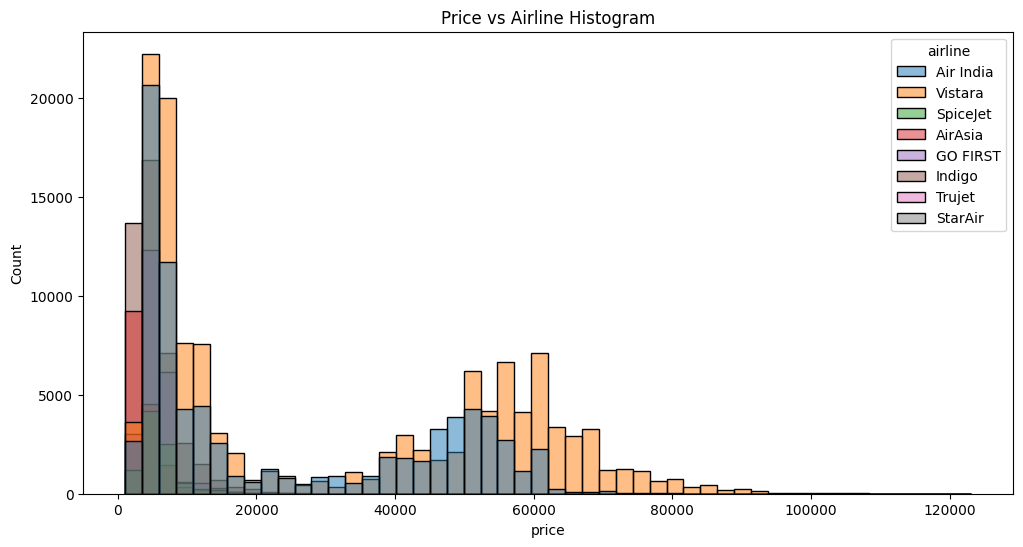

In [173]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='price',hue='airline',bins=50)
plt.xlabel('price')
plt.title('Price vs Airline Histogram')

# Insights
- from the above histogram,we can say Vistara air line is costly compared to Air India

In [174]:
df.columns

Index(['date', 'airline', 'dep_time', 'source_city', 'duartion', 'stops',
       'arr_time', 'destination_city', 'price', 'class', 'flight_code',
       'class_label'],
      dtype='object')

Text(0.5, 1.0, 'Price vs Source_city Histogram')

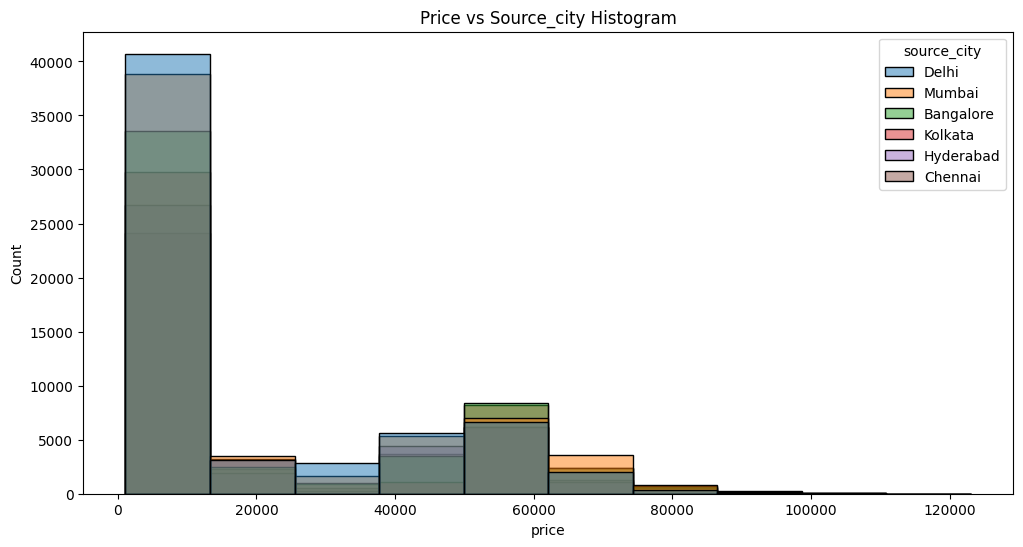

In [180]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='price',hue='source_city',bins=10)
plt.xlabel('price')
plt.title('Price vs Source_city Histogram')

- flights which are taking off from delhi are clostlier

In [176]:
df.columns

Index(['date', 'airline', 'dep_time', 'source_city', 'duartion', 'stops',
       'arr_time', 'destination_city', 'price', 'class', 'flight_code',
       'class_label'],
      dtype='object')

Text(0.5, 1.0, 'Price vs Class Histogram')

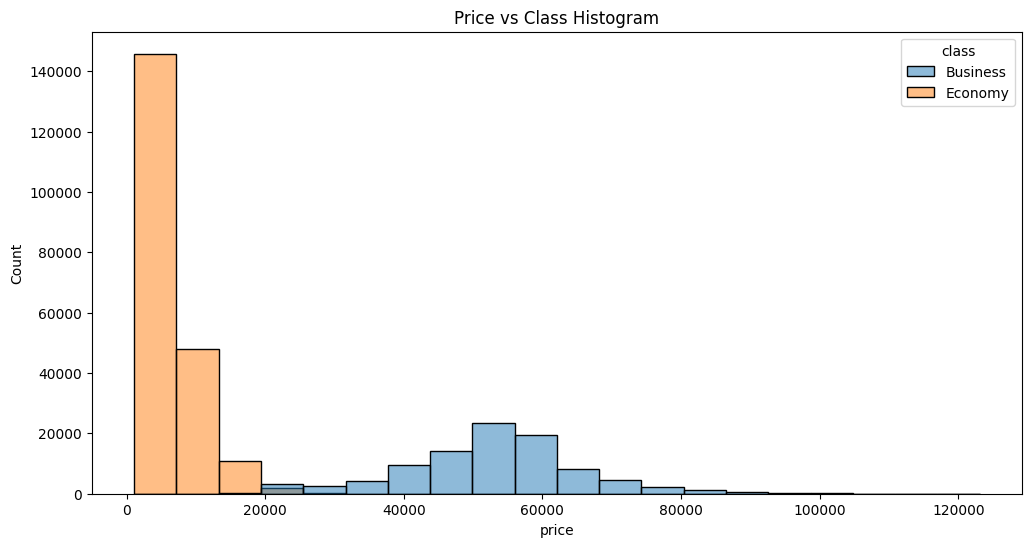

In [183]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='price',hue='class',bins=20)
plt.xlabel('price')
plt.title('Price vs Class Histogram')

- economy class is paying more than business class

In [ ]:
#data = [100,75, 50, 120, 80]
#labels = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5']
colors = sns.color_palette('pastel')[0:2]
plt.pie(data=df['price'], labels = df['class'], colors = colors, autopct='%.0f%%')
plt.show()

In [185]:
#groupby the data by delivery type
data = df.groupby("class")["price"].sum()
data

class
Business    4.911815e+09
Economy     1.358734e+09
Name: price, dtype: float64

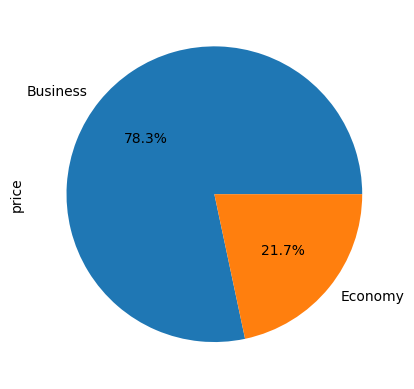

In [186]:
data.plot.pie(autopct="%.1f%%");

In [187]:
#groupby the data by delivery type
data = df.groupby("airline")["price"].sum()
data

airline
Air India    1.901530e+09
AirAsia      6.585809e+07
GO FIRST     1.309948e+08
Indigo       2.295802e+08
SpiceJet     5.568148e+07
StarAir      3.008920e+05
Trujet       1.330300e+05
Vistara      3.886471e+09
Name: price, dtype: float64

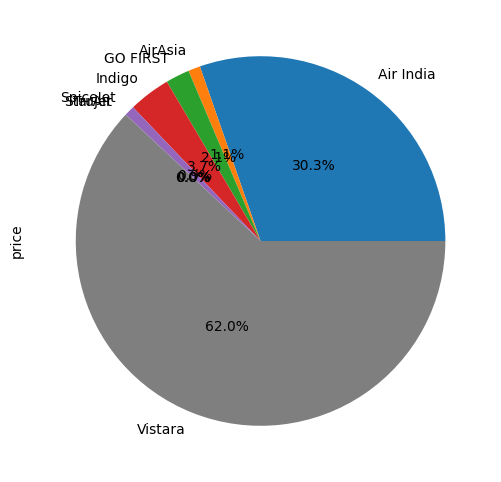

In [199]:
data.plot.pie(autopct="%.1f%%",pctdistance=0.5,
                              labeldistance=1.1,figsize=(12, 6));
#plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

In [200]:
df.columns

Index(['date', 'airline', 'dep_time', 'source_city', 'duartion', 'stops',
       'arr_time', 'destination_city', 'price', 'class', 'flight_code',
       'class_label'],
      dtype='object')

In [202]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [203]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [210]:
print(df['stops'].unique())


['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t

In [211]:
df['stops'] = df['stops'].str.strip().str.replace('\n', '').str.replace('\t', '')


In [212]:
df['stops'].unique()

array(['non-stop', '1-stop', '1-stopVia IDR', '1-stopVia IXU',
       '1-stopVia Chennai', '1-stopVia Lucknow', '1-stopVia STV',
       '1-stopVia Hyderabad', '1-stopVia GAY', '2+-stop',
       '1-stopVia Guwahati', '1-stopVia GAU', '1-stopVia VTZ',
       '1-stopVia NDC', '1-stopVia IXE', '1-stopVia Raipur',
       '1-stopVia PAT', '1-stopVia RPR', '1-stopVia Patna',
       '1-stopVia Kolkata', '1-stopVia HYD', '1-stopVia Delhi',
       '1-stopVia Bhubaneswar', '1-stopVia BBI', '1-stopVia Surat',
       '1-stopVia Indore', '1-stopVia GOP', '1-stopVia Nagpur',
       '1-stopVia NAG', '1-stopVia Vishakhapatnam', '1-stopVia Mangalore',
       '1-stopVia Mumbai', '1-stopVia KLH', '1-stopVia MYQ',
       '1-stopVia Kolhapur', '1-stopVia JRG', '1-stopVia Ranchi',
       '1-stopVia IXR', '1-stopVia JGB', '1-stopVia Mysore'], dtype=object)

In [215]:
df['source-destination'] = df['source_city']+'-'+df['destination_city']

In [243]:
df1=df.groupby(['airline','source-destination','class'])[['price']].sum().round(2).reset_index()

In [244]:
df1.head()

,airline,source-destination,class,price
0,Air India,Bangalore-Chennai,Business,34963500.0
1,Air India,Bangalore-Chennai,Economy,8129064.0
2,Air India,Bangalore-Delhi,Business,43979497.0
3,Air India,Bangalore-Delhi,Economy,10521233.0
4,Air India,Bangalore-Hyderabad,Business,40475393.0


In [235]:
from matplotlib.ticker import ScalarFormatter, FuncFormatter

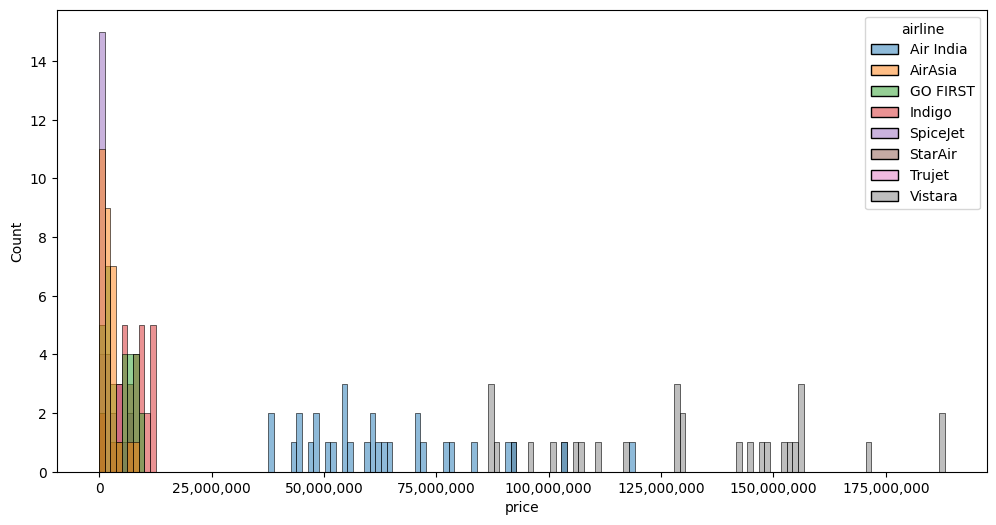

In [236]:
plt.figure(figsize=(12,6))
ax=sns.histplot(data=df1,x='price',hue='airline',bins=150)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

In [241]:
df1['source-destination'].unique()

array(['Bangalore-Chennai', 'Bangalore-Delhi', 'Bangalore-Hyderabad',
       'Bangalore-Kolkata', 'Bangalore-Mumbai', 'Chennai-Bangalore',
       'Chennai-Delhi', 'Chennai-Hyderabad', 'Chennai-Kolkata',
       'Chennai-Mumbai', 'Delhi-Bangalore', 'Delhi-Chennai',
       'Delhi-Hyderabad', 'Delhi-Kolkata', 'Delhi-Mumbai',
       'Hyderabad-Bangalore', 'Hyderabad-Chennai', 'Hyderabad-Delhi',
       'Hyderabad-Kolkata', 'Hyderabad-Mumbai', 'Kolkata-Bangalore',
       'Kolkata-Chennai', 'Kolkata-Delhi', 'Kolkata-Hyderabad',
       'Kolkata-Mumbai', 'Mumbai-Bangalore', 'Mumbai-Chennai',
       'Mumbai-Delhi', 'Mumbai-Hyderabad', 'Mumbai-Kolkata'], dtype=object)

Text(0.5, 1.0, 'Price Comparison by Airline for Each Source-Destination')

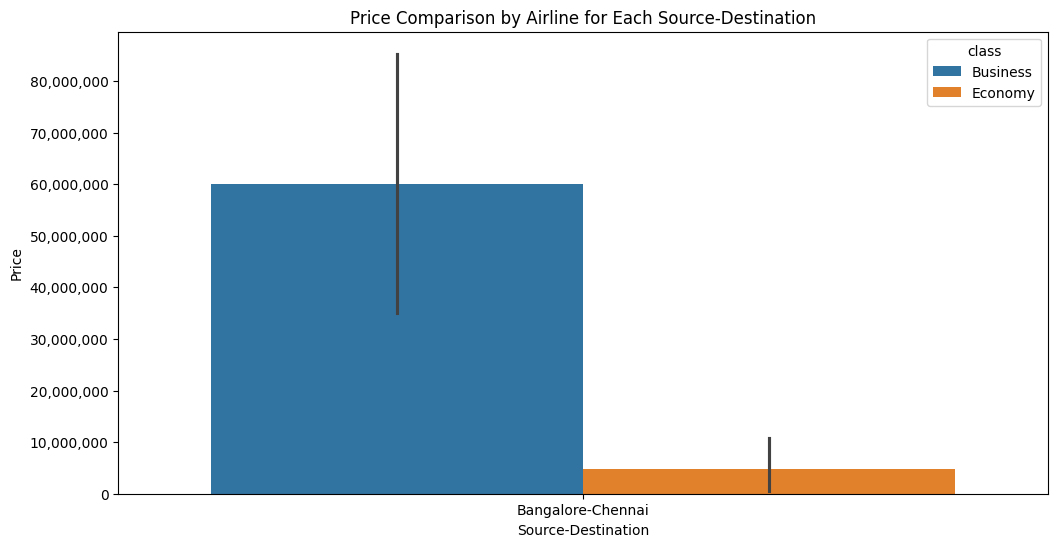

In [248]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df1[df1['source-destination']=='Bangalore-Chennai'], x='source-destination', y='price', hue='class')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
# Set labels and title
plt.xlabel('Source-Destination')
plt.ylabel('Price')
plt.title('Price Comparison by Airline for Each Source-Destination')

# Rotate x-a